In [28]:
#Import package
import pandas as pd
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Word cloud
#!pip install wordcloud   #to install wordcloud on jupyter notebook
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt


In [29]:
#load Dataset
data_analyst_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataAnalyst.csv')
data_scientist_df = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/DataScientist.csv')
google_job = pd.read_csv('/Users/nuel/neuefische/Capstone-Project-/dataset/gsearch_jobs 3.csv')


In [30]:
#Rename Columns to lower and replace white spaces with Underscore
data_analyst_df.rename(columns=lambda x : x.lower(), inplace=True)
data_analyst_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
data_scientist_df.rename(columns=lambda x : x.lower(), inplace=True)
data_scientist_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
google_job.rename(columns=lambda x : x.lower(), inplace=True)
google_job.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)


In [31]:
data_analyst_df2 = data_analyst_df[['job_title', 'job_description']].copy()
data_scientist_df2 = data_scientist_df[['job_title', 'job_description']].copy()
google_job_df2 = google_job[['title', 'description']].copy()

In [32]:
#lets rename columns of the google job dataset
google_job_df2 = google_job_df2.rename(columns={'title': 'job_title', 'description': 'job_description'})

In [33]:
#concatenate Data Analyst Dataset and Google Analytics Dataset
analysts_df = pd.concat([data_analyst_df2, google_job_df2], ignore_index=True)

In [34]:
analysts_df.head()

,job_title,job_description
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...


In [35]:
#Word Cloud: from Akshay's Notebook

nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('popular')
# Instantiate
lemmatizer = WordNetLemmatizer()
# Create our own stop words
stop_words = (                                        \
    "\n ’ the company and of for in to a or years l   \
    other were that ended we at with our included s   \
    firm follows under consolidated have these over   \
    include billion million december which an le from \
    certain le — million had show apple including     \
    as noncurrent current total three are on not is   \
    involving millions shows centers contains      "  \
             ).split()
# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits
# Print the exclusion list
print(exclist)

[nltk_data] Downloading package punkt to /Users/nuel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nuel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/nuel/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/nuel/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/nuel/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/nuel/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/nue

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789


[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection popular


In [38]:
# Create a Function
def clean_texts(text):
    """ Function to perform preprocessing """
    
    # Convert to lower cases
    text = text.lower()
    
    # Remove punctuations and numbers
    text = text.translate(str.maketrans("", "", exclist))
    
    
    # Tokenization
    tokens = word_tokenize(text)
        
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens
    clean_text = " ".join(tokens)
    
    # Return the output
    return clean_text
# Apply the function to all disclosures
analysts_df['job_title'] = analysts_df['job_title'].apply(clean_texts)
data_scientist_df2['job_title'] = data_scientist_df2['job_title'].apply(clean_texts)
# View the first 5 rows
analysts_df.head(3)


,job_title,job_description
0,data analyst center immigration justice cij,Are you eager to roll up your sleeves and harn...
1,quality data analyst,Overview\n\nProvides analytical and technical ...
2,senior data analyst insight analytics team cus...,We’re looking for a Senior Data Analyst who ha...


In [39]:
data_scientist_df2.head(3)


,job_title,job_description
0,senior data scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,data scientist product analytics,"At Noom, we use scientifically proven methods ..."
2,data science manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...


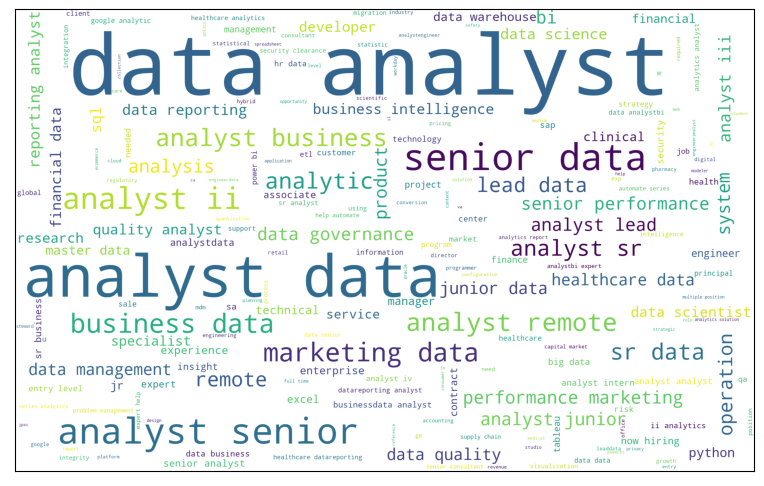

In [42]:

# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
analysts_word_cloud = wc.generate(analysts_df['job_title'].str.cat(sep=" "))
#scientist_word_cloud = wc.generate(data_scientist_df2['job_title'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(analysts_word_cloud);

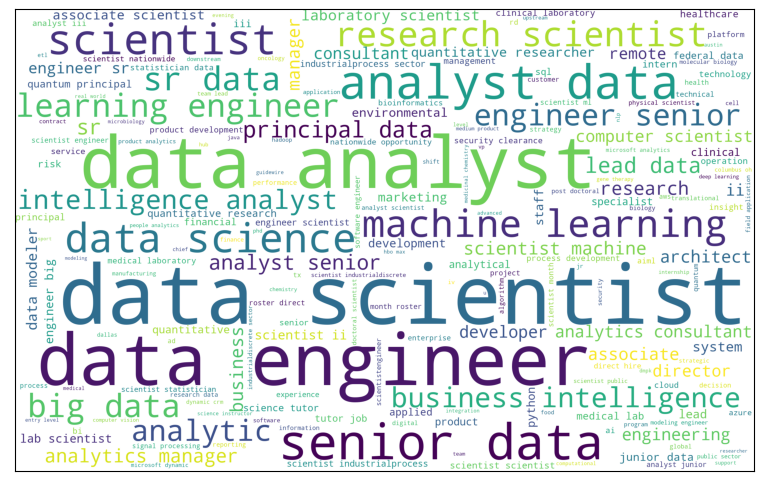

In [43]:
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
scientist_word_cloud = wc.generate(data_scientist_df2['job_title'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(scientist_word_cloud);

In [44]:
#Merge Analyst and Scientist Dataset
master_df = pd.concat([data_scientist_df2, analysts_df], ignore_index=True)

In [45]:
master_df.head(3)

,job_title,job_description
0,senior data scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,data scientist product analytics,"At Noom, we use scientifically proven methods ..."
2,data science manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...


In [46]:
# Job title Column: Nuel's NB

#job title column to lower case
master_df.job_title = master_df.job_title.str.lower()

In [47]:
#job title column: text to word

master_df['job_title'] = master_df['job_title'].replace({'/':'  ','-':' ', '~': ' '},regex=True)
master_df['job_title_split'] = master_df['job_title'].apply(word_tokenize)

master_df.job_title_split.head()

0                [senior, data, scientist]
1    [data, scientist, product, analytics]
2                 [data, science, manager]
3                          [data, analyst]
4                [director, data, science]
Name: job_title_split, dtype: object

In [48]:
my_keywords = ['data', 'scientist', 'analytics', 'analyst', 'science', '/analyst', 'analyst/', 'engineer', 'analyst-', 'engineer-', 'engineer/', 'engineer/', 'architect', 'analysts', 'analysis' ]


In [49]:
master_df['job_title_split'] = (master_df['job_title_split'].apply(lambda x: [title for title in x if title in my_keywords]))
master_df.job_title_split.head()

0               [data, scientist]
1    [data, scientist, analytics]
2                 [data, science]
3                 [data, analyst]
4                 [data, science]
Name: job_title_split, dtype: object

In [50]:
#to join words together
master_df['job_title_split']=master_df.job_title_split.apply(lambda x: ' '.join(list(x)))
master_df.job_title_split.head()

0              data scientist
1    data scientist analytics
2                data science
3                data analyst
4                data science
Name: job_title_split, dtype: object

In [51]:
master_df.job_title_split.unique()

array(['data scientist', 'data scientist analytics', 'data science',
       'data analyst', '', 'scientist', 'data', 'data engineer',
       'data scientist data science', 'data science analyst',
       'data analyst analytics', 'analyst', 'data data scientist',
       'data scientist engineer', 'data scientist analytics engineer',
       'analytics data scientist', 'analytics', 'data scientist data',
       'data architect', 'data scientist analytics data',
       'analyst data science', 'engineer', 'scientist data analytics',
       'data science analytics', 'engineer data',
       'analytics data engineer', 'analyst data scientist',
       'data engineer data scientist engineer', 'analyst analytics',
       'data analytics analyst', 'data engineer data scientist',
       'engineer data scientist', 'data science data science',
       'scientist engineer', 'data analysis', 'data scientist architect',
       'data science data scientist', 'data data',
       'data scientist analysis', 

In [52]:
master_df['adv_job_title'] = master_df.job_title_split
master_df.head()

,job_title,job_description,job_title_split,adv_job_title
0,senior data scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",data scientist,data scientist
1,data scientist product analytics,"At Noom, we use scientifically proven methods ...",data scientist analytics,data scientist analytics
2,data science manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,data science,data science
3,data analyst,Sapphire Digital seeks a dynamic and driven mi...,data analyst,data analyst
4,director data science,"Director, Data Science - (200537)\nDescription...",data science,data science


In [65]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data analyst', 'data analyst analytics', 'analyst',
       'analyst data',
        'data analyst data data',
       'data analyst data', 'science data analyst',
       'data analytics analyst', 'analytics data analyst',
       'analyst data analyst', 'analyst data analytics',
       'data data analyst',
       'data analyst analyst', 'data data analyst data',
       'data analyst analytics data analytics',
       'analyst data analytics data analyst',
       'data analyst data analytics', 'analyst data data',
       'data analyst data analytics analytics',
       'data analytics', 'data analyst data analyst',
       'analytics analyst data', 'analyst analytics', 'data data',
       'analyst analyst data',
       'analytics', 'analytics data',
       'analytics data analytics',
       'data analytics data',
       'analytics analyst', 'analyst analyst data analyst',
       'data data analytics','analyst analyst', 'analyst/ data analyst/', 'data analyst/', 'analyst/', 'data /analyst', 'analyst-',
       'analyst- data','data analyst-', 'data analyst- analytics', 'data analyst- data','analyst data analyst data','analyst data analyst data analyst', 
       'data analyst data data data', 'data architect data data analyst', 
       'data analyst architect', 'data analyst data engineer data',
       'data analyst data scientist analyst', 'analysts analyst', 'data analysts', 'analyst data analysis', 
       'data analysis', 'data analysis data', 'data analyst analysis', 'data data analysis',
       'data data analyst analysis', 'engineer analysis', 'analysis analysis',
       'engineer data analyst',
       'data engineer data analyst',
       'data engineer analyst',
       'data analyst engineer',
       'analytics data engineer',
       'data engineer data analytics',
        'data engineer analytics',
        'analyst engineer scientist',
        'engineer analytics data science',
        'engineer analytics',
        'data engineer analyst data', 
        'data engineer analyst data analyst', 'data architect data analyst', ], 'data analyst')

In [71]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science',
       'data scientist', 'scientist',
       'data scientist data science', 'data data scientist',
       'data scientist data',
       'data science data science', 'data science data scientist', 'data data science', 'science data science',
       'data scientist science',
       'data science data',
       'scientist data', 'scientist scientist', 'scientist science',
       'scientist data science', 'science scientist',
       'science data scientist', 'data scientist scientist',
       'scientist scientist data',
       'scientist scientist science',
       'data data science data',
       'data scientist data scientist', 'architect data scientist',
       'data data scientist engineer','data scientist data analyst', 'data scientist data architect', 
       'scientist analyst', 'scientist engineer science', 'data scientist analysis', 'scientist analysis',
       'scientist data science analysis',
       'data scientist engineer', 'data scientist analytics engineer',
       'data engineer data scientist engineer',
       'data engineer data scientist', 'engineer scientist',
       'science engineer',
       'scientist engineer',
       'data science engineer', 'scientist engineer scientist',
       'engineer engineer scientist', 'engineer scientist scientist',
       'analyst engineer scientist',
       'scientist engineer engineer', 'engineer scientist engineer',
       'data scientist data engineer', 'engineer analytics data science',
       'engineer data science', 'engineer science',
       'engineer data scientist', 'data engineer scientist',
       'data engineer data science', 'data scientist science data',
       'scientist data science science', 'scientist science science'],'data scientist')

In [55]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['', 'data',
       'analysis scientist', 'analysis', 'analysis data analysis',
       'analyst analysis'],'others')

In [72]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data science analyst', 'analyst data science',
       'science data analyst',
       'analyst data science analytics',
       'data analyst data science analytics',
       'data analyst data science', 
       'data science analytics', 'data analyst data science analytics',
       
       'analytics data science',
       'data analyst science',
       'analytics science' ,
       'data science data analyst',
       'science engineer',
       'data science engineer', 'engineer data science', 'science' ],'data science analyst')

In [76]:
#to replace key words
master_df['adv_job_title'] = master_df['adv_job_title'].replace([
       'data scientist data analytics analyst',
       'data analyst scientist', 'data scientist analyst',
       'scientist data analyst', 
       'analyst data scientist',
       'data scientist analytics',
       'analytics data scientist', 
       'data scientist analytics data', 'scientist data analytics',
       'data analytics data scientist', 'data analyst data scientist',
       'data scientist data science analytics',
       'analytics data science', 'data scientist data analytics',
       'analyst scientist', 'scientist analytics', 'analyst- data scientist', 
       'data scientist architect', 'architect data scientist',
       'data science analyst engineer', ],'data science analyst')

In [58]:
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data engineer',
       'engineer', 'engineer data',
       'data engineer data', 'data engineer engineer',
       'data engineer engineer data engineer',
       'engineer engineer',
       'data data engineer', 'engineer science',
       'data engineer data engineer', 'data engineer- data', 'data engineer/', 'data engineer/ data', 
       'data engineer/ data engineer', 'data engineer-'], 'data engineer')

In [77]:
master_df['adv_job_title'] = master_df['adv_job_title'].replace(['data architect analyst', 'architect data analyst',
       'data architect',
       'data architect data', 'data science architect',
       'data engineer architect', 'data engineer data architect',
       'data analytics architect', 'data architect engineer',
       'data analyst architect engineer', 'data data architect',
       'architect data', 'data architect data engineer', 'data data architect data', ],'others')

In [60]:
master_df.head()

,job_title,job_description,job_title_split,adv_job_title
0,senior data scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",data scientist,data scientist
1,data scientist product analytics,"At Noom, we use scientifically proven methods ...",data scientist analytics,data scientist analyst
2,data science manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,data science,data scientist
3,data analyst,Sapphire Digital seeks a dynamic and driven mi...,data analyst,data analyst
4,director data science,"Director, Data Science - (200537)\nDescription...",data science,data scientist


In [66]:
master_df.adv_job_title.unique()

array(['data scientist', 'data scientist analyst', 'data analyst',
       'others', 'data engineer', 'data science analyst',
       'data architect', 'scientist science science', 'science'],
      dtype=object)

In [78]:
master_df.groupby(master_df['adv_job_title']).count()

,job_title,job_description,job_title_split
adv_job_title,,,
data analyst,4764,4764,4764
data engineer,846,846,846
data science analyst,164,164,164
data scientist,1776,1776,1776
others,582,582,582


<AxesSubplot:xlabel='adv_job_title'>

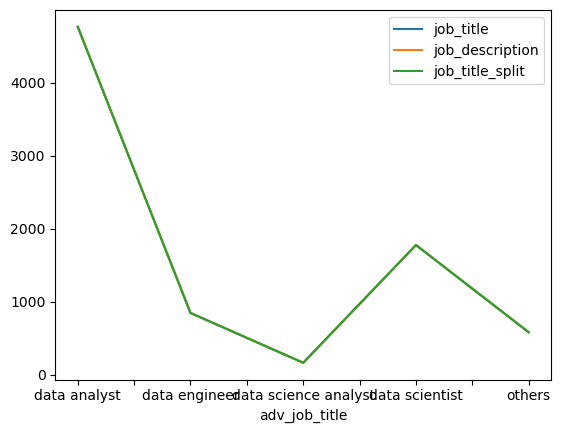

In [84]:
master_df.groupby(master_df['adv_job_title']).count().plot()

In [ ]:
#Job description column 

In [ ]:
#remember to drop duplicates

In [80]:
master_df.query('adv_job_title == "data engineer analyst"')

,job_title,job_description,job_title_split,adv_job_title
